In [1]:
from graph import *
%matplotlib inline

-> pour n=1000, generer 5 types, 10 examples de chaque de taille differente et les alterer 20 fois ?

-> ajouter poids ou non dans graphe ?

-> todo label tridimensionel

-> ajouter seed génération

-> calculer matrice labels

In [2]:
%%time
db, path = gen_export_db(50,20,10,5,0.05)

CPU times: user 893 ms, sys: 26.1 ms, total: 919 ms
Wall time: 910 ms


In [3]:
path

'dbs/db-1549404712.6150692.dat'

In [4]:
db.shape

(1050, 2)

In [5]:
db[:,1]

array(['star', 'star', 'star', ..., 'tree', 'tree', 'tree'], dtype=object)

In [6]:
np.unique(db[:,1],return_counts=True)

(array(['chain', 'cube', 'grid', 'ring', 'star', 'tree'], dtype=object),
 array([189,  84, 147, 231, 168, 231]))

In [7]:
from kernels import *

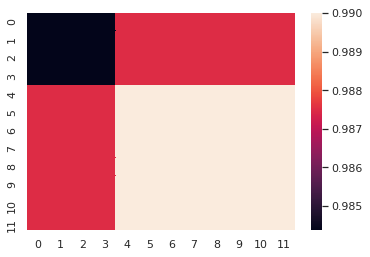

(12,) (12,)


ValueError: X.shape[1] = 4 should be equal to 8, the number of samples at training time

In [8]:
db2, path = gen_export_db(3,3,10,5,0.05)
test(db2)